In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('../data/playstore.csv',sep=';')
pd.set_option('display.width', 200)  # Largeur totale
pd.set_option('display.max_colwidth', 50)  # Largeur par colonne

pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

In [14]:
#affiche les colonnes
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], dtype='object')


In [15]:
#affiche le debut du dataframe 
print(df.head(3))

                                                 App        Category  Rating  Reviews  Size    Installs  Type Price Content Rating                     Genres      Last Updated Current Ver  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1      159   19M     10,000+  Free     0       Everyone               Art & Design   January 7, 2018       1.0.0   
1                                Coloring book moana  ART_AND_DESIGN     3.9      967   14M    500,000+  Free     0       Everyone  Art & Design;Pretend Play  January 15, 2018       2.0.0   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hid...  ART_AND_DESIGN     4.7    87510  8.7M  5,000,000+  Free     0       Everyone               Art & Design    August 1, 2018       1.2.4   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  


In [16]:
#Décris les colonnes qu'on utilisera en grande partie pour l'analyse des données qui sont non-numériques
#Size, Installs et Price à standardiser
print(df[['App','Category','Type','Content Rating','Genres','Size','Installs','Price']].describe(include='object'))

           App Category   Type Content Rating Genres                Size    Installs  Price
count    10840    10840  10839          10840  10840               10840       10840  10840
unique    9659       33      2              6    119                 461          21     92
top     ROBLOX   FAMILY   Free       Everyone  Tools  Varies with device  1,000,000+      0
freq         9     1972  10039           8714    842                1695        1579  10040


In [17]:
#Décris les colonnes numériques
print(df[['Rating','Reviews']].describe())

            Rating       Reviews
count  9366.000000  1.084000e+04
mean      4.191757  4.441529e+05
std       0.515219  2.927761e+06
min       1.000000  0.000000e+00
25%       4.000000  3.800000e+01
50%       4.300000  2.094000e+03
75%       4.500000  5.477550e+04
max       5.000000  7.815831e+07


In [18]:
print(df[['Reviews','Rating']].corr())

          Reviews    Rating
Reviews  1.000000  0.068141
Rating   0.068141  1.000000


In [19]:
# Fonction générique pour calculer les pourcentages
def calculate_percentage(df, column,new_count_column=None, new_percentage_column=None):

      # Définir des noms par défaut si aucun nom n'est fourni
    if new_count_column is None:
        new_count_column = f'{column}_count'
    if new_percentage_column is None:
        new_percentage_column = f'{column}_percentage'

     # Compter les occurrences
    value_counts = df[column].value_counts()

    # Créer un nouveau DataFrame
    result_df = value_counts.reset_index()
    result_df.columns = [column, new_count_column]

    total = value_counts.sum()
    result_df[new_percentage_column] = (result_df[new_count_column] / total) * 100
    return result_df

In [20]:
test =calculate_percentage(df,'Content Rating')
#test.columns
test

,Content Rating,Content Rating_count,Content Rating_percentage
0,Everyone,8714,80.387454
1,Teen,1208,11.143911
2,Mature 17+,499,4.603321
3,Everyone 10+,414,3.819188
4,Adults only 18+,3,0.027675
5,Unrated,2,0.018450


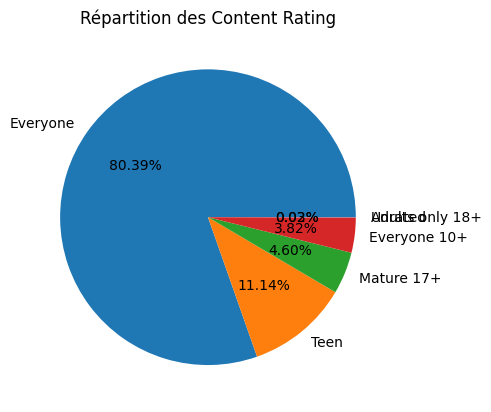

In [21]:
#autopct pour définir les décimales affichés (.2 pour 2 décimales)
test.set_index('Content Rating')['Content Rating_percentage'].plot(kind='pie', autopct='%1.2f%%', title="Répartition des Content Rating")
plt.ylabel("")  # Pour supprimer le label de l'axe
plt.show()

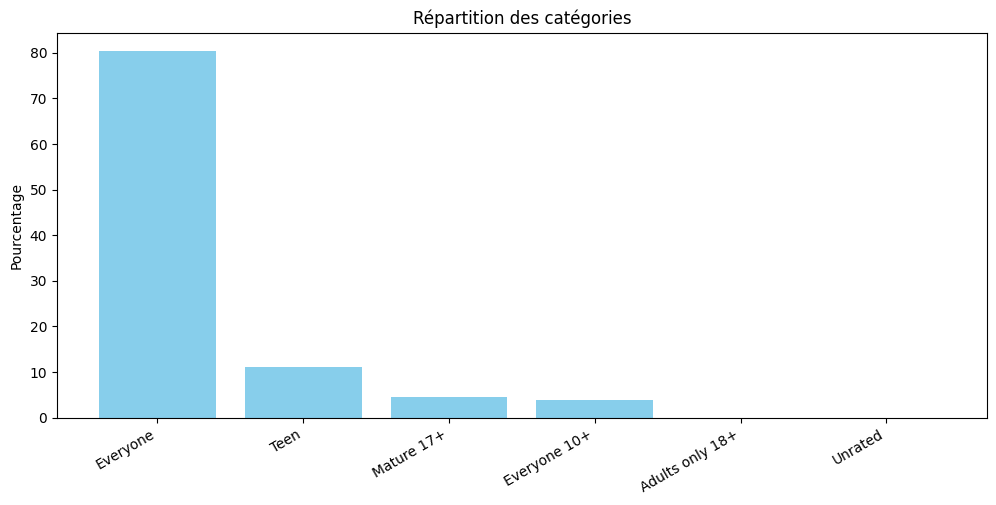

In [22]:
plt.figure(figsize=(12, 5))
plt.bar(test['Content Rating'], test['Content Rating_percentage'], color='skyblue')
plt.title("Répartition des catégories")
plt.xticks(rotation=30, ha='right')  # Faire pivoter les étiquettes
plt.ylabel("Pourcentage")
plt.show()

In [23]:
dfClean = df.drop_duplicates()
dfContentApp = dfClean[['App','Content Rating','Category']]

dfCount=dfContentApp['Content Rating'].value_counts().reset_index()
dfCount['Percentage Content']=dfCount['count'].apply
#dfContentApp['Percentage Content']=

In [24]:
#dfClean 
dfClean[dfClean['App'] == 'ROBLOX']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [25]:
#DataFrame de toutes les applications avec leurs categories
variables = ['App', 'Category']
dfAppCat=df[variables]

dfAppCat

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite ‚Äì FREE Live Cool Themes, Hid...",ART_AND_DESIGN
3,pRom MakeUp Tutorial,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN
...,...,...
10835,Sya9a Maroc - FR,FAMILY
10836,Fr. Mike Schmitz Audio Teachings,FAMILY
10837,Parkinson Exercices FR,MEDICAL
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE


In [26]:
tab =df.drop_duplicates(subset='Content Rating').reset_index(drop=True)
tab

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,pRom MakeUp Tutorial,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
2,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,"500,000+",Free,0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
3,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
4,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
5,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up


In [27]:
#créer un dataframe avec le nom de la catégorie et les autres colonnes le nombre d'app 

#eventuellement mettre une liste avec toutes les applications mais ça sera pas nécéssaire et ça serait redondant
dfNbappCat= dfAppCat.drop_duplicates(subset='Category')

# La colonne 'col1' est déjà une Series
liste_cat=dfNbappCat['Category']
#.to_list pour que ça soit une liste

#dtype pour le type des valeurs et type(liste_cat) pour le type de la structure de donnée
type(liste_cat)

pandas.core.series.Series

In [28]:
#affiche les catégories
liste_cat

0            ART_AND_DESIGN
49        AUTO_AND_VEHICLES
98                   BEAUTY
139     BOOKS_AND_REFERENCE
187                BUSINESS
297                  COMICS
335           COMMUNICATION
476                  DATING
699               EDUCATION
855           ENTERTAINMENT
1004                 EVENTS
1048                FINANCE
1176         FOOD_AND_DRINK
1256     HEALTH_AND_FITNESS
1446         HOUSE_AND_HOME
1514     LIBRARIES_AND_DEMO
1562              LIFESTYLE
1653                   GAME
2014                 FAMILY
2243                MEDICAL
2544                 SOCIAL
2654               SHOPPING
2801            PHOTOGRAPHY
2959                 SPORTS
3102       TRAVEL_AND_LOCAL
3233                  TOOLS
3352        PERSONALIZATION
3450           PRODUCTIVITY
3575              PARENTING
3626                WEATHER
3665          VIDEO_PLAYERS
3715     NEWS_AND_MAGAZINES
3820    MAPS_AND_NAVIGATION
Name: Category, dtype: object

In [29]:
#On crée un DF qui associe la catégorie a son nb d'occurence (en eliminant les doublons au préalable)
dfAppCatClean =dfAppCat.drop_duplicates()

#On compte et on rajoute un index (classé dans l'ordre décroissant
dfCatCount = dfAppCatClean['Category'].value_counts().reset_index()
#df_cat_nb

dfCatCount.head(3)



,Category,count
0,FAMILY,1909
1,GAME,960
2,TOOLS,829


In [30]:
dfAppCatClean

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite ‚Äì FREE Live Cool Themes, Hid...",ART_AND_DESIGN
3,pRom MakeUp Tutorial,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN
...,...,...
10835,Sya9a Maroc - FR,FAMILY
10836,Fr. Mike Schmitz Audio Teachings,FAMILY
10837,Parkinson Exercices FR,MEDICAL
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE


In [41]:
#Prioriser la méthode compacte, sinon eval ou assign 

#dfCatCount['Percentage']= dfCatCount['count'].apply(lambda x: (x / 9744) * 100)
#dfCatCount.eval("Percentage = (count / 9744) * 100", inplace=True)
dfCatCount['Percentage'] = (dfCatCount['count'] / 9744) * 100
#dfCatCount = dfCatCount.assign(Percentage=lambda df: (df['count'] / 9744) * 100)

dfCatCount.head(20)

,Category,count,Percentage
0,FAMILY,1909,19.591544
1,GAME,960,9.852217
2,TOOLS,829,8.507800
3,BUSINESS,420,4.310345
4,MEDICAL,396,4.064039
5,PERSONALIZATION,376,3.858785
6,PRODUCTIVITY,374,3.838259
7,LIFESTYLE,369,3.786946
8,FINANCE,345,3.540640
9,SPORTS,327,3.355911


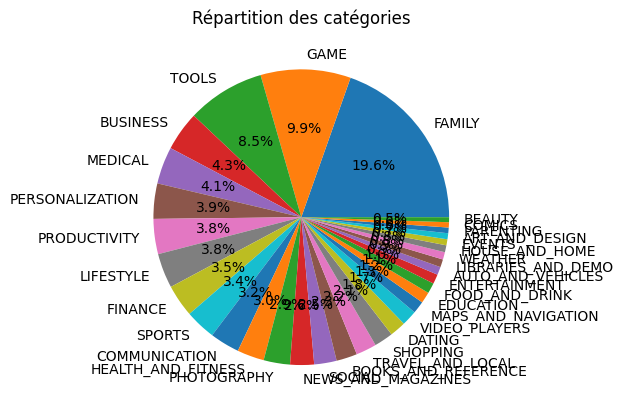

In [32]:
dfCatCount.set_index('Category')['Percentage'].plot(kind='pie', autopct='%1.1f%%', title="Répartition des catégories")
plt.ylabel("")  # Pour supprimer le label de l'axe
plt.show()

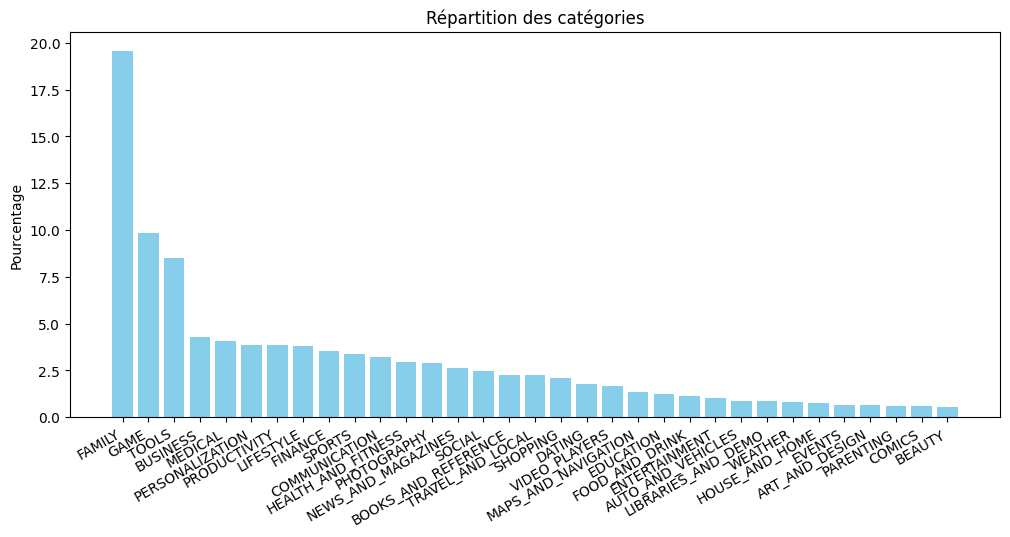

In [33]:
dfCatCount = dfCatCount.sort_values(by='Percentage', ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(dfCatCount['Category'], dfCatCount['Percentage'], color='skyblue')
plt.title("Répartition des catégories")
plt.xticks(rotation=30, ha='right')  # Faire pivoter les étiquettes
plt.ylabel("Pourcentage")
plt.show()

In [34]:
#Transforme la séries de categories en dataframe qui associe a chaque cate 0 pour le moment
df_cat_nb=liste_cat.to_frame().copy().reset_index(drop=True)

df_cat_nb['nb']= np.zeros(len(df_cat_nb))


In [35]:
#parcourir toutes les applications et compare avec toutes les categories possible et si c'est vrai alors on incremente la quantité d'app dans une cate
#On va crée un dataframe qui associe les cate a leurs nb d'app donc faudra incrémenter ce dataframe (index i)
for cat_app in dfAppCat['Category'] :
    #regarde toutes les cate et augmente l'index en fonction
    for i,cate in enumerate(liste_cat) : #si c'est vrai alors pour cet cate (d'index i) on incremente la colonne i 
        if cat_app == cate :
            
            #incrémente
            df_cat_nb.loc[i,'nb'] += 1
            
            
            

In [36]:
#Donne la répartition des Content Rating pour les 3 catégories les plus representés
df_family = df[df['Category'] == 'FAMILY']
df_game = df[df['Category'] == 'GAME']
df_tools = df[df['Category'] == 'TOOLS']

df_family_percentage = calculate_percentage(df_family,'Content Rating')
df_family_percentage

,Content Rating,Content Rating_count,Content Rating_percentage
0,Everyone,1529,77.535497
1,Teen,261,13.235294
2,Everyone 10+,131,6.643002
3,Mature 17+,50,2.535497
4,Unrated,1,0.050710


In [37]:
df_game_percentage = calculate_percentage(df_game,'Content Rating')
df_game_percentage

,Content Rating,Content Rating_count,Content Rating_percentage
0,Everyone,608,53.146853
1,Teen,331,28.933566
2,Everyone 10+,131,11.451049
3,Mature 17+,74,6.468531


In [38]:
df_tools_percentage = calculate_percentage(df_tools,'Content Rating')
df_tools_percentage

,Content Rating,Content Rating_count,Content Rating_percentage
0,Everyone,835,99.051008
1,Teen,5,0.593120
2,Mature 17+,2,0.237248
3,Unrated,1,0.118624


In [39]:
dfClean.to_csv("playstore_cleaned.csv", index=False)